<a href="https://colab.research.google.com/github/danielfrgs/LCD-MADI-2021-1/blob/main/Arboles_autobalanceables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/5_Arboles_autobalanceables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta práctica, veremos una de las implementaciones más populares de árboles autobalanceables: el árbol rojo-negro.

# Definición

Decimos que un árbol binario es un árbol rojo-negro si cumple las siguientes propiedades:

1. Cada nodo tiene asignado un color: rojo o negro.
2. La raíz del árbol es negra.
3. Los hijos de un nodo rojo son negros.
4. Para cada nodo con al menos un hijo nulo (es decir, que no tiene al menos un hijo), el número de nodos negros desde cada nodo hasta cualquiera de sus descendientes nulos es el mismo para cualquiera de sus descendientes. A este número de nodos negros se le conoce como la *altura negra*.

# Representación
## Nodos

Para representar un nodo del árbol, usamos la siguiente estructura de datos:

In [1]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None

Con campos definidos de la siguiente manera:

* `red`: Si el nodo es rojo (`True`) o negro (`False`).
* `parent`: El padre del nodo.
* `val`: El valor del nodo.
* `left`: El hijo izquierdo.
* `right`: El hijo derecho.

## Árbol

Si bien en principio podemos utilizar tan solo los nodos para representar el árbol completo (de la forma que hicimos con BST), es más sencillo crear una segunda estructura para guardar todo el árbol. Esta tiene dos atributos:

* `nil`: El llamado "nodo sentinela" (explicado más adelante). Este nodo tiene `red=False`, y sus demás atributos `=None`.
* `root`: La raíz del árbol.

El algoritmo se vuelve mucho más sencillo si todos los nodos tienen dos hijos. Para garantizar esto, si a un nodo le falta un hijo, le asignamos como hijo el nodo sentinela de su árbol correspondiente. Por ejemplo, si tenemos el siguiente árbol:

```
      5
     /  \
    3    7
   /
  1
```

Con los nodos sentinelas (representados por `X`) se vuelve:

```
       5
     /   \
    3     7
   / \   / \
  1   X X   X
 / \
X   X
```

# Rotaciones
Las rotaciones son una operación sobre los árboles binarios que toman a un nodo como "pivote", y "rotan" a sus descendientes alrededor de él. La forma más fácil de ilustrarlas es con un diagrama:

## Rotación izquierda
En este caso, el pivote es `x`.

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img6.jpg?raw=1" alt="Drawing" style="width: 600px;"/>

## Rotación derecha
En este caso, el pivote es `y`.

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img7.jpg?raw=1" alt="Drawing" style="width: 600px;"/>

Podemos ver que la rotación izquierda es inversa de la derecha.

# Inserción

Los algoritmos que no alteran el árbol (búsqueda, caminata, etc.) son idénticos a los de un BST normal. Sin embargo, el algoritmo de inserción (y borrado) sufre muchos cambios, ya que al insertar el nuevo nodo, se deben de mantener las propiedades del árbol negro-rojo.

Para resolver esto, si queremos insertar un nodo nuevo `z`, le asignamos un color rojo (ya que de otra manera cambiaría la altura negra, lo cual sería difícil de resolver) y lo insertamos como si fuese un BST normal. Finalmente, llamamos una función `fix_insert` que modifica el árbol de modo que se sigan cumpliendo las propiedades.

Una vez insertado el nodo, existen dos casos posibles para el color de su padre:

1. Su padre es negro. En este caso, no tenemos que hacer nada, ya que todas las propiedades se siguen cumpliendo.
2. Su padre es rojo. Aquí, se viola la propiedad 3.

Ahora, asumiendo que ocurre el segundo caso, si el padre de `z` (llámese `p`) es un nodo izquierdo (el caso en el que es derecho es simétrico), pueden ocurrir 3 ordenamientos diferentes:

## Caso 1

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img1.jpg?raw=1" alt="Drawing" style="width: 700px;"/>

Suponiendo que tenemos el primer caso, lo único que tenemos que hacer es "mover" el color rojo hacia arriba; de esta manera, la altura negra sigue siendo la misma.

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img2.jpg?raw=1" alt="Drawing" style="width: 600px;"/>

Sin embargo, es posible que este desplazamiento haga que ahora el nodo padre viole la propiedad 3; por ejemplo, si el padre del nodo con valor 12 también es rojo. Para resolver esto, hacemos un nuevo ajuste, esta vez tomando al nodo padre como si fuese el nodo que insertamos.

## Casos 2 y 3

Nótese que podemos transformar el caso 2 en el caso 3 haciendo una rotación izquierda sobre el padre de `z`. Como tanto `z` como su padre son rojos, esta rotación no afectará la altura negra.

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img4.jpg?raw=1" alt="Drawing" style="width: 400px;"/>

Una vez que tenemos el caso 3, coloreamos el padre de `z` negro, y su abuelo rojo, y luego hacemos una rotación hacia derecha sobre el abuelo de `z`.

<img src="https://github.com/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/img/img5.jpg?raw=1" alt="Drawing" style="width: 700px;"/>



In [2]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None

def print_tree(node, lines=None, level=0):
    if lines is None:
        lines = []
    if node.val is not None:
        print_tree(node.left, lines, level+1)
        lines.append(f"{' ' * 4 * level} {node.val} {'r' if node.red else 'b'}")
        print_tree(node.right, lines, level+1)
    else:
        lines.append(f"{' ' * 4 * level}  x")
    return '\n'.join(lines)

class RBTree:
    def __init__(self):
        self.nil = RBNode(None)
        self.root = self.nil

    def insert(self, val):
        new_node = RBNode(val)
        new_node.parent = None
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True

        parent = None
        current = self.root
        while current != self.nil:
            parent = current
            if new_node.val < current.val:
                current = current.left
            elif new_node.val > current.val:
                current = current.right
            else:
                return

        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.val < parent.val:
            parent.left = new_node
        else:
            parent.right = new_node

        self.fix_insert(new_node)

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.nil:
            y.left.parent = x

        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.nil:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y
        
    def fix_insert(self, new_node):
        while new_node != self.root and new_node.parent.red:
            if new_node.parent == new_node.parent.parent.right: # si el padre es izquierdo
                u = new_node.parent.parent.left  # tío (hermano del padre)
                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.left: # Caso 2 
                        self.rotate_right(new_node.parent)
                        new_node = new_node.parent
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_left(new_node.parent.parent)
                    
            else: # si el padre es derecho
                u = new_node.parent.parent.right # tío (hermano del padre)

                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_right(new_node.parent.parent)
        self.root.red = False

    def __repr__(self):
        return print_tree(self.root)

In [3]:
tree = RBTree()
for x in range(1, 21):
    tree.insert(x)
print(tree)

                  x
             1 b
                  x
         2 b
                  x
             3 b
                  x
     4 r
                  x
             5 b
                  x
         6 b
                  x
             7 b
                  x
 8 b
                  x
             9 b
                  x
         10 b
                  x
             11 b
                  x
     12 r
                      x
                 13 b
                      x
             14 r
                      x
                 15 b
                      x
         16 b
                      x
                 17 b
                      x
             18 r
                      x
                 19 b
                          x
                     20 r
                          x


# Ejercicios

## Ejercicio 1

Investiga e implementa el algoritmo para borrar un nodo de un árbol rojo-negro. Utiliza en la medida de lo posible las funciones existentes (i.e. rotaciones)

Primero vamos a eliminar como tal el nodo, recordemos que el color es importante en este árbol, por lo que según e color que eliminemos vamos a tener que hacer las módifcaciones. 

Sea, `x` el nodo que queremos eliminar. obtengamos el color del nodo, el cual debe de estar guadada por medio de la clase generada en clase `RBNode` en `.red`, si es `False` asumiremos que es Negro.

A partir de aquí hay varios casos a considerar:

1. **El nodo no tiene nodos hijos**

2. **Tiene un nodo hijo izquierdo o derecho**:

3. **Tiene nodos hijos izquierdo y derecho**

Estos a su vez se pueden dividir en 2 casos, cuando el nodos es **rojo** o cuando es **negro**. En toal estamos hablando de 6 casos que debemos de considerar. En cada caso, tenemos que proceder de tal forma que las propiedades de un arbol rojo-negro se sigan cumpliendo.

Veamos la forma de proceder en cada caso:

- **Nodo rojo sin hijos:** En este caso, al ser rojo y no poseer hijos, se puede eliminar directamente sin afectar la 'altura negra' del árbol.

- **Nodo negro sin hijos:** En este caso, támbien podemos elliminar el nodo directamente, o mejor dicho remplzando con un `NIL`, sin embargo, el retirar este nodo cambia la altura para su padre, por lo que tenemos que hacer ciertas modificaciones, que se vuelven a dividir en 6 casos, donde se considera si el padre era rojo o negro, y si el nodo izquierdo o derecho era rojo o negro, con hijos rojos o negros:

  - **Padre rojo, e hijo izquierdo o derecho negro, con nietos rojos**: Es decir eliminamos el nodo hijo derecho que no tiene hijos. En este caso, al tener un nodo padre rojo, para preservar la altura, deberíamos de hacer un intercambio de color entre el padre y el hijo no eliminado. 
  - **Padre rojo, e hijo izquierdo o derecho negro, y nieto rojo**: En este caso, necesitamos hacer un giro a la izquierda o derecha, segun sea el caso, aplicando las propiedades de rotación vistas antes.
  - **Padre es negro, el hijo izquierdo es rojo, el nieto derecho tiene bisnietos negros** En este caso, de nuevo solo bastaría una rotación con el nodo hijo rojo tras la eliminación del nodo negro sin hijos; esto es posible debido a que tiene bisnietos negros, la rotación permite el equilibrio de la altura de nuevo.
  - **Padre Negro, el hijo izquierdo es rojo, el nieto derecho tiene un bisnieto rojo**: En este caso se requiere hacer dos rotaciones sobre el hijo negro. de nuevo dado el nodo rojo.
  - **Padre negro, el hijo izquierdo es negro con el nieto rojo derecho**: En este caso una doble rotación sobre el nodo nieto rojo aliniaría de nuevo las alturas.
  - ** Padre Negro, el hijo izquierdo es negro, sus nietos también son negros**: este caso es el más complicado, pues solo resta pintar el nodo hijo restante de rojo, y verificar las anturas con los subarboles anteriores, por o que tendríamos que verificar las propiedades anteriores para que se cumplan las alturas.

- **Nodo rojo con un hijo**: Primero recordemos que un nodo rojo, no puede teneer hijos rojos, es decir que obligatoriamente el nodo rojo tiene un hijo negro, pero dado que la altura del negro debe ser 1, solo puede ser un elemento `NIL` negro, ya que en el caso de un elemento negro normal, la altura será mayor. Esto quiere decir que este caso por la propiedades que debe de cumplir el árbol no existe.

- **Nodo negro con un hijo**: Si el elemento negro tiene un hijo entonces hay un elemento `NIL` negro con una altura negra 1. Por lo tanto, en el otro lado debería haber un nodo rojo sin hijos. Para eliminar dicho elemento, basta con transferir el valor del elemento rojo al nodo negro, mientras que se conservará la altura del negro.

- **Nodo rojo con dos hijos**: En este caso, por ser un nodo rojo, solo deberíamos de cambiar el valor del nodo seleccionado con el nodo rojo más cercano y menor, por lo que el problema se combierte en eliminar un nodo rojo con cero nodos hijos. Este cambio solo ranfiere el valor, y mantiene el color.

- **Nodo negro con dos hijos**: Al ser un nodo negro bastaria con hacer una rotación conveniente de forma que el problema se reduzca a elimiar un nodo con un solo hijo.

Como se puede observar a mayoria de los casos depende de los casos con uno o sin hijos, lo lo que el algoritmo se tendría que correr de forma recursiva hasta la eliminación del nodo.

## Algoritmo

Vamos a comenzar definiendo una función, la cual vamos definir dentro de la propia clase ya definida para poder hacer uso de las funciones ya definidas de forma directa, como las rotaciomnes que ya vimos serán necesarias. La función necesita recibir el arbol y el nodo que se quiere eliminar.

El algoritmo se va dividir en dos, con el fin de hacerlo un poco más eficiente. Primero vamos a crear un código que borre el nodo, y posteriroemnete, si es el caso, vamos a hacer las modificaciones pertinentes para que vuelva a cumplir las propiedades de un árbol Rojo-Negro.

Entonces continuamos donde nos quedamos:

Obtenemos el color del nodo que queremos eliminar.

A contunuación entonces se tienen los casos donde el nodo solo tiene un nodo hijo. Y como ya vimos solo aplica cuando el nodo padre es negro, y se trata de traspasar el valor.

1. Si el hijo izquierdo `node.left` `is not` `NULL`
  - Entonces asiganmos el valor a `node.right` el nodo de remplazo `x` y sustituimos por el nodo original.
2. Si el hijo izquierdo `node.right` `is not` `NULL`
  - Entonces asiganmos el valor a `node.left` el nodo de remplazo `x` y sustituimos por el nodo original.

3. Si los casos anteriores entonces tiene dos hijos:
  1. Asignamos el mínimo del subárbol derecho del nodo que queremos eliminar en `y`.

  2. Guardamos el color de `y`.

  3. Asignamos el hijo derecho `node.right` de `y` a `x`

  4. Si `y` es un hijo del nodo que queremos eliminar, entonces tendremos que hacer al padre de `x` a `y`, preparando para hacer el reemplazo.

  5. Sino, entonces remplazamos `y` con `x`

  6. Remplazamos el nodo que queremos sustituir con `y`

  7. Establecemos el color de `y` segun el color capturado.


Hasta ahora si el nodo que queriamos eliminar estos casos, como ya se había explicado, no requiere  mayor rabajo más que algunos remplazos, y una liminación directa, pero como vimos, si se trata de un nodo negro, entonces tenemos que hacer modificaciones para lograr mantener las condiciones del árbol rojo-negro.

Así dentro de esta primerá función vamos a llamar a otra función que logré mantener las condiciones. Entonces:

Si `colornode = 0`, entonces:

1. Si `x` es el nodo por el que se reemplazo al nodo eliminado, no es la raíz del árbol, y es negro.

  1. Si `x` es el `node.left` de su nodo padre entonces:

      - Asigna `w` al hermano de `x`
      - Si `w.red 1`, vamos a empezar a dividir los casos:

         **Caso 1**:  
        - Pintamos `w` de negro tal que `w.red = False`
        - Pintamos el nodo padre de `w` y `x` de rojo
        - Hacemos una rotación izquierda `rotate_left` entre `w` y su padre.
        - Reasignarmos al niño derecho del padre de `x`, `w`

      - Si el color de los nodos hijos de `w` es negro:

        **Caso 2**:
        - Establezca el color de `w` en rojo
        - Asigne el padre de `x` a `x`.
      
      - Si el color del hijo derecho de `w` es negro.

        **Caso 3**
        - Cambiamos el color del hijo izquierdo `node.left` a rojo `.red = 1` de `w`
        - Cambiamos el color de `w` a rojo
        - Hacemos un rotacion derecha `rotation_right` sonre `w` y su hijo derecho.
        - Asignnamos al hijo derecho del padre de `x` a `w`.
      
      - Sino, entonces

        **Caso 4**
        - Cambiemos el color de `w` al color del padre de `x`.
        - Cambiemos el color del padre del padre de `x` a negro.
        - Cambiemos el color del hijo derecho de `w` a negro.
        - Hagamos una rotación izquierda `left-rotate` sobre el padre de `x`.
        - Hagamos `x` la raíz del árbol.
  2. Repetimos el proceso pero ahora con `node.right`.

  3. Cambiemos el color de `x` a negro.



In [11]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None

def print_tree(node, lines=None, level=0):
    if lines is None:
        lines = []
    if node.val is not None:
        print_tree(node.left, lines, level+1)
        lines.append(f"{' ' * 4 * level} {node.val} {'r' if node.red else 'b'}")
        print_tree(node.right, lines, level+1)
    else:
        lines.append(f"{' ' * 4 * level}  x")
    return '\n'.join(lines)

class RBTree:
    def __init__(self):
        self.nil = RBNode(None)
        self.root = self.nil
        self.nil.left = None
        self.nil.right = None
        self.nil.color = 0

    def insert(self, val):
        new_node = RBNode(val)
        new_node.parent = None
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True

        parent = None
        current = self.root
        while current != self.nil:
            parent = current
            if new_node.val < current.val:
                current = current.left
            elif new_node.val > current.val:
                current = current.right
            else:
                return

        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.val < parent.val:
            parent.left = new_node
        else:
            parent.right = new_node

        self.fix_insert(new_node)

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.nil:
            y.left.parent = x

        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.nil:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y
        
    def fix_insert(self, new_node):
        while new_node != self.root and new_node.parent.red:
            if new_node.parent == new_node.parent.parent.right: # si el padre es izquierdo
                u = new_node.parent.parent.left  # tío (hermano del padre)
                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.left: # Caso 2 
                        self.rotate_right(new_node.parent)
                        new_node = new_node.parent
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_left(new_node.parent.parent)
                    
            else: # si el padre es derecho
                u = new_node.parent.parent.right # tío (hermano del padre)

                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_right(new_node.parent.parent)
        self.root.red = False

    # AQUI EMPIEZA NUESTRA FUNCIÓN 

    # Función para la corrección del borrado.
    def fix_delete(self, x):
        # Vamos a ejecutar los casos, hasta que ya no haya irregularidad en las caráteristicas 
        # del árbol.
        while x != self.root and x.red == False:
          # Buscamos que x sea el hijo izquierdo del padre de x
            if x == x.parent.left:
                s = x.parent.right
                # Caso 1
                if s.red == True:
                    s.red = False
                    x.parent.red = True
                    self.rotate_left(x.parent)
                    s = x.parent.right
                # Caso 2
                if s.left.red == False and s.right.red == False:
                    s.red = True
                    x = x.parent
                else:
                # Caso 3
                    if s.right.red == False:
                        s.left.red = False
                        s.red = True
                        self.rotate_right(s)
                        s = x.parent.right
                # Asigmnamos los valores para generar la recursión.
                    s.red = x.parent.red
                    x.parent.red = False
                    s.right.red = False
                    self.rotate_left(x.parent)
                    x = self.root
            # Caso 4
            else:
                s = x.parent.left
                if s.red == True:
                    s.red = False
                    x.parent.red = True
                    self.rotate_right(x.parent)
                    s = x.parent.left

                if s.right.red == False and s.left.red == False:
                    s.red = True
                    x = x.parent
                else:
                    if s.left.red == False:
                        s.right.red = False
                        s.red = True
                        self.rotate_left(s)
                        s = x.parent.left

                    s.red = x.parent.red
                    x.parent.red = False
                    s.left.red = False
                    self.rotate_right(x.parent)
                    x = self.root
        # Asignamos el color de x en negro
        x.red = False

    # Tenemos que crear una función de reemplazo pues no existe ya definida.
    # Es realmente muy sencillo. Va a recibir dos nodos, los que queremos reemplzar
    def replace(self, u, v):
      # Va a reasignar los parentzcos de u, tal que v deje de estar considerado.
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    # Función de borrado para los casos sencillos
    # la función recibe el arbol y el valor del 
    def delate(self, node, key):
        z = self.nil
        # Generamos un bucle hasta que el nodo se encontrado
        while node != self.nil:
            if node.val == key:
                z = node

            if node.val <= key:
                node = node.right
            else:
                node = node.left

        if z == self.nil:
            print("Cannot find key in the tree")
            return
        # Asignamos el nodo por eliminar
        y = z
        # Guardamos su vaor 
        y_original_color = y.red
        # Iniciamos el ciclo descrito antes
        if z.left == self.nil:
            x = z.right
            self.replace(z, z.right)
        elif (z.right == self.nil):
            x = z.left
            self.replace(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.replace(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.replace(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        # Llamamos al correctos de propiedades si es necesario
        if y_original_color == False:
            self.fix_delate(x)

    def __repr__(self):
        return print_tree(self.root)

## Ejercicio 2

Escribe una función para convertir un árbol rojo-negro a una gráfica de `networkx`, de modo que cada nodo tenga como propiedad su color. Posteriormente, genera un árbol aleatorio, conviértelo a `networkx` y grafícalo de modo que los nodos mostrados tengan los colores correctos. Asegúrate que el árbol tenga el layout apropiado.

Vamos a tomar como referencia el código que vimos en los BST, pues es la misma idea:

In [131]:
import matplotlib.pyplot as plt
import networkx as nx
#from networkx.drawing.nx_pydot import graphviz_layout

def build_graph(bst, g=None):
    if g is None:
        g = nx.Graph()
    
    if bst.val is not None:
        build_graph(bst.left, g)
        g.add_node(bst.val, color ='red' if bst.red == True else 'grey')
        if bst.left.val is not None:
            g.add_edge(bst.val, bst.left.val)
        if bst.right.val is not None:
            g.add_edge(bst.val, bst.right.val)
        build_graph(bst.right, g)
    return g

In [129]:
bst = RBTree()
bst.insert(5)
bst.insert(4)
bst.insert(6)
bst.insert(10)
bst.insert(13)
bst.insert(25)

In [132]:
g = build_graph(bst.root)

# Creamos la secuencia de collores a aprtir del atributo color que recibe en la función
colored_dict = nx.get_node_attributes(g, 'color')
default_color = 'blue'
color_seq = [colored_dict.get(node, default_color) for node in g.nodes()]

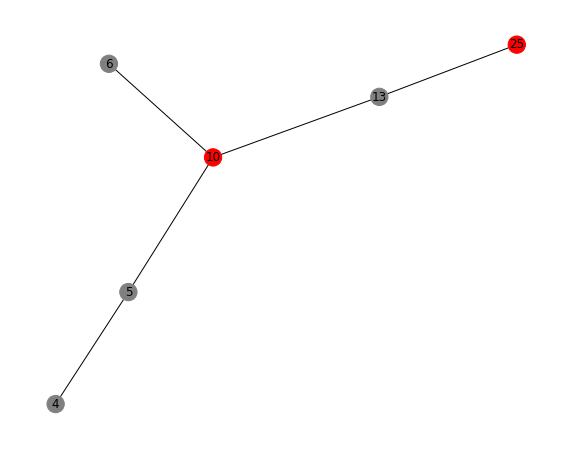

In [133]:
fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, node_color=color_seq)